In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
import os

In [3]:
from pathlib import Path

In [4]:
import sys
sys.path.append("C:\\sebin\\lab\\ecg2\\git\\ecg_data_wfdb")

from use.mitbih_ecg.form import ecg_segment 


---

In [5]:
path = "C:\\sebin\\lab\\ecg2\\data\\testData\\forhak\\105"

In [6]:
pathWindow = path+"\\"+"window"

In [7]:
files = sorted(Path(pathWindow).iterdir(),key=os.path.getmtime)

In [8]:
files

[WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/0.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/1.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/2.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/3.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/4.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/5.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/6.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/7.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/8.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/9.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/10.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/11.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/12.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/fo

In [9]:
f = list(files)

In [10]:
f

[WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/0.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/1.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/2.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/3.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/4.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/5.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/6.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/7.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/8.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/9.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/10.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/11.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/105/window/12.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/fo

In [11]:
dataWindow = []
for name in f:
    print(name)
    dataWindow.append(pd.read_csv(name,header=None))

C:\sebin\lab\ecg2\data\testData\forhak\105\window\0.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\1.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\2.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\3.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\4.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\5.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\6.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\7.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\8.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\9.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\10.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\11.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\12.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\13.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\14.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\15.csv
C:\sebin\lab\ecg2\data\testData\forhak\105\window\16.csv
C:\sebin\lab\ecg2\data\testData\forhak\10

In [12]:
backup = dataWindow

In [13]:
dataWindow = backup

In [14]:
len(dataWindow)

171

In [15]:
for i in range(len(dataWindow)):
    dataWindow[i] = dataWindow[i].to_numpy().flatten()

In [16]:
dataWindow[0]

array([287., 286., 286., ..., 184., 179.,  nan])

In [17]:
len(dataWindow[0])

3601

In [18]:
for i in range(len(dataWindow)):
    dataWindow[i] = dataWindow[i][0:-1]

In [19]:
len(dataWindow[0])

3600

# estimate data

In [20]:
estimateData = np.ndarray(3600*len(dataWindow),dtype=float)

In [21]:
for i in range(len(dataWindow)):
    s = i*3600
    estimateData[s:s+3600] = dataWindow[i]

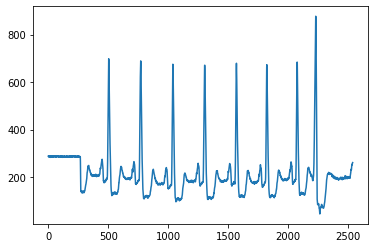

In [22]:
plt.plot(estimateData[2140:360*13])

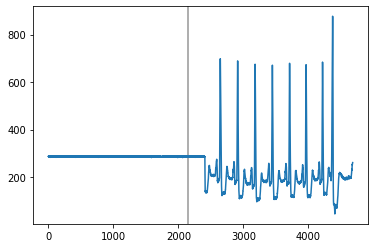

In [23]:
plt.plot(estimateData[0:360*13])
plt.axvspan(2140,2150,color='gray',alpha = 0.5)

In [24]:
segmentFile = open(path+"\\"+"segment.txt")

In [25]:
segmentData = []
while(True):
    line = None
    line = segmentFile.readline()
    print(line)
    if(line):
        d = []
        d.append(line.strip().split(","))
        d.append(segmentFile.readline().strip().split(","))
        d.append(segmentFile.readline().strip().split(","))

        print(d)
        segmentData.append(d)
    else:
        break
    


0,2644,true,8,N

[['0', '2644', 'true', '8', 'N'], ['0', '2284', '2644'], ['0', '2644', '2824']]
0,2911,true,80,N

[['0', '2911', 'true', '80', 'N'], ['0', '2551', '2911'], ['0', '2911', '3091']]
0,3179,true,80,N

[['0', '3179', 'true', '80', 'N'], ['0', '2819', '3179'], ['0', '3179', '3359']]
0,3445,true,81,N

[['0', '3445', 'true', '81', 'N'], ['0', '3085', '3600'], ['1', '0', '25']]
1,110,true,81,N

[['1', '110', 'true', '81', 'N'], ['0', '3350', '3600'], ['1', '0', '290']]
1,363,true,85,N

[['1', '363', 'true', '85', 'N'], ['1', '3', '363'], ['1', '363', '543']]
1,616,true,85,N

[['1', '616', 'true', '85', 'N'], ['1', '256', '616'], ['1', '616', '796']]
1,771,true,139,V

[['1', '771', 'true', '139', 'V'], ['1', '411', '771'], ['1', '771', '951']]
1,1131,true,59,N

[['1', '1131', 'true', '59', 'N'], ['1', '771', '1131'], ['1', '1131', '1311']]
1,1404,true,79,N

[['1', '1404', 'true', '79', 'N'], ['1', '1044', '1404'], ['1', '1404', '1584']]
1,1677,true,79,N

[['1', '1677', 'true', '

In [26]:
len(segmentData)

2452

In [27]:
segmentData[0]

[['0', '2644', 'true', '8', 'N'], ['0', '2284', '2644'], ['0', '2644', '2824']]

In [28]:
windowSegment = segmentData

In [29]:
windowSegment

[[['0', '2644', 'true', '8', 'N'],
  ['0', '2284', '2644'],
  ['0', '2644', '2824']],
 [['0', '2911', 'true', '80', 'N'],
  ['0', '2551', '2911'],
  ['0', '2911', '3091']],
 [['0', '3179', 'true', '80', 'N'],
  ['0', '2819', '3179'],
  ['0', '3179', '3359']],
 [['0', '3445', 'true', '81', 'N'], ['0', '3085', '3600'], ['1', '0', '25']],
 [['1', '110', 'true', '81', 'N'], ['0', '3350', '3600'], ['1', '0', '290']],
 [['1', '363', 'true', '85', 'N'], ['1', '3', '363'], ['1', '363', '543']],
 [['1', '616', 'true', '85', 'N'], ['1', '256', '616'], ['1', '616', '796']],
 [['1', '771', 'true', '139', 'V'], ['1', '411', '771'], ['1', '771', '951']],
 [['1', '1131', 'true', '59', 'N'],
  ['1', '771', '1131'],
  ['1', '1131', '1311']],
 [['1', '1404', 'true', '79', 'N'],
  ['1', '1044', '1404'],
  ['1', '1404', '1584']],
 [['1', '1677', 'true', '79', 'N'],
  ['1', '1317', '1677'],
  ['1', '1677', '1857']],
 [['1', '1945', 'true', '80', 'N'],
  ['1', '1585', '1945'],
  ['1', '1945', '2125']],
 [['

# real data

In [31]:
realData = pd.read_csv(path+"\\"+"105.csv",header=None).to_numpy().flatten()

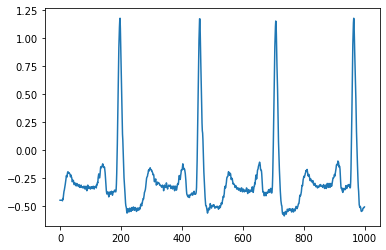

In [32]:
plt.plot(realData[0:1000])

# ★figure

3. v

In [34]:
windowSegment

[[['0', '2644', 'true', '8', 'N'],
  ['0', '2284', '2644'],
  ['0', '2644', '2824']],
 [['0', '2911', 'true', '80', 'N'],
  ['0', '2551', '2911'],
  ['0', '2911', '3091']],
 [['0', '3179', 'true', '80', 'N'],
  ['0', '2819', '3179'],
  ['0', '3179', '3359']],
 [['0', '3445', 'true', '81', 'N'], ['0', '3085', '3600'], ['1', '0', '25']],
 [['1', '110', 'true', '81', 'N'], ['0', '3350', '3600'], ['1', '0', '290']],
 [['1', '363', 'true', '85', 'N'], ['1', '3', '363'], ['1', '363', '543']],
 [['1', '616', 'true', '85', 'N'], ['1', '256', '616'], ['1', '616', '796']],
 [['1', '771', 'true', '139', 'V'], ['1', '411', '771'], ['1', '771', '951']],
 [['1', '1131', 'true', '59', 'N'],
  ['1', '771', '1131'],
  ['1', '1131', '1311']],
 [['1', '1404', 'true', '79', 'N'],
  ['1', '1044', '1404'],
  ['1', '1404', '1584']],
 [['1', '1677', 'true', '79', 'N'],
  ['1', '1317', '1677'],
  ['1', '1677', '1857']],
 [['1', '1945', 'true', '80', 'N'],
  ['1', '1585', '1945'],
  ['1', '1945', '2125']],
 [['

In [35]:
for i in range(len(windowSegment)):
    if(windowSegment[i][0][4]=="V"):
        print(i)

7
16
34
67
81
127
162
207
244
266
273
354
380
403
443
473
553
591
618
626
657
751
877
903
918
966
1023
1127
1166
1170
1184
1204
1369
1555
1640
1652
1655
1656
1657
1663
1669
1672
1678
1686
1689
1690
1692
1708
1710
1721
1725
1728
1738
1739
1757
1766
1773
1794
1795
1810
1817
1818
1820
1832
1834
1836
1843
1851
1856
1862
1865
1882
1890
1892
1899
1903
1912
2064
2213
2214
2215
2239
2284
2297
2298
2299
2339
2345
2346
2354
2358
2396
2406
2416
2447


In [41]:
segment = windowSegment[34]

In [42]:
segment

[['3', '635', 'true', '121', 'V'], ['3', '275', '635'], ['3', '635', '815']]

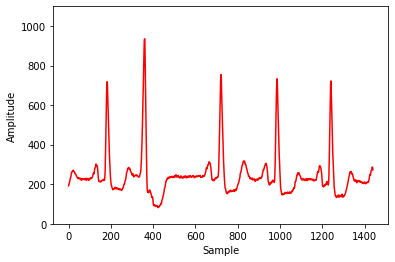

In [47]:
startIndex = 3600*int(segment[0][0])+int(segment[0][1])
plt.plot(estimateData[startIndex-360:startIndex+360*3],color='red')
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.ylim((0,1099))
plt.savefig("05_04")

In [45]:
windowSegment[34-1:34+4]

[[['3', '457', 'true', '82', 'N'], ['3', '97', '457'], ['3', '457', '637']],
 [['3', '635', 'true', '121', 'V'], ['3', '275', '635'], ['3', '635', '815']],
 [['3', '996', 'true', '59', 'N'], ['3', '636', '996'], ['3', '996', '1176']],
 [['3', '1261', 'true', '81', 'N'],
  ['3', '901', '1261'],
  ['3', '1261', '1441']],
 [['3', '1515', 'true', '84', 'N'],
  ['3', '1155', '1515'],
  ['3', '1515', '1695']]]

# real segment

In [33]:
pathRealData = "C:\\sebin\\lab\\ecg2\\data\\original\\01_mitbih"

In [34]:
ecg = ecg_segment(pathRealData+"\\"+str(100),channel=[0],ver="aami",baseLineRemoveFlag=1,leftSegSize=360,rightSegSize=180,resample_seg_size=-1)

100
tmp:  2274
startIndex,endIndex:  1   2271
seg:  2271
interval:  2271
startIndex:  9  
seg,interval:  2262   2262


# check

In [35]:
ecg.beat[0]

array(['77', 'N', '0.84'], dtype='<U32')

## real 시작점 

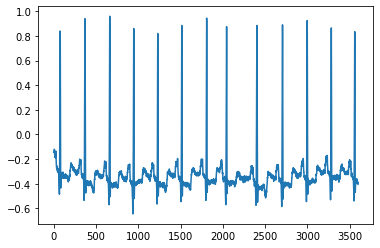

In [55]:
plt.plot(realData[0:3600])

In [37]:
realStartArray = ecg.beat[1]

In [38]:
realStartArray

array(['370', 'N', '0.94'], dtype='<U32')

In [67]:
realStart = int(realStartArray[0])

## segmentStart

In [103]:
segmentStartArray = windowSegment[2]

In [104]:
segmentStartArray

[['1', '1241', 'true', '70', 'N'], ['1', '881', '1241'], ['1', '1241', '1421']]

In [105]:
segmentStartFlag = int(segmentStartArray[0][0])

In [106]:
segmentStartIndex = int(segmentStartArray[0][1])

## estimateStart

In [107]:
estimateStart = segmentStartFlag * 3600 + segmentStartIndex 

In [108]:
estimateStart

4841

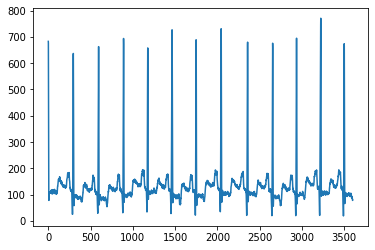

In [109]:
plt.plot(estimateData[estimateStart:estimateStart+3600])

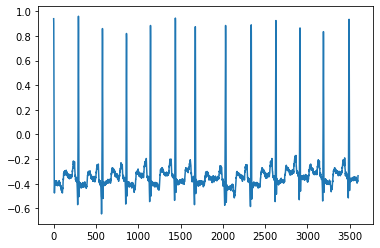

In [110]:
plt.plot(realData[realStart:realStart+3600])

In [111]:
backup = windowSegment

In [113]:
backup

[[['0', '1301', 'true', '16', 'S'],
  ['0', '941', '1301'],
  ['0', '1301', '1481']],
 [['1', '934', 'true', '6', 'S'], ['1', '574', '934'], ['1', '934', '1114']],
 [['1', '1241', 'true', '70', 'N'],
  ['1', '881', '1241'],
  ['1', '1241', '1421']],
 [['1', '1537', 'true', '72', 'N'],
  ['1', '1177', '1537'],
  ['1', '1537', '1717']],
 [['1', '1836', 'true', '72', 'N'],
  ['1', '1476', '1836'],
  ['1', '1836', '2016']],
 [['1', '2131', 'true', '73', 'N'],
  ['1', '1771', '2131'],
  ['1', '2131', '2311']],
 [['1', '2417', 'true', '75', 'N'],
  ['1', '2057', '2417'],
  ['1', '2417', '2597']],
 [['1', '2705', 'true', '74', 'N'],
  ['1', '2345', '2705'],
  ['1', '2705', '2885']],
 [['1', '2989', 'true', '75', 'N'],
  ['1', '2629', '2989'],
  ['1', '2989', '3169']],
 [['1', '3285', 'true', '72', 'N'],
  ['1', '2925', '3285'],
  ['1', '3285', '3465']],
 [['1', '3598', 'true', '68', 'N'], ['1', '3238', '3600'], ['2', '0', '178']],
 [['2', '294', 'true', '72', 'N'], ['1', '3534', '3600'], ['2'

In [114]:
estimateSegment = windowSegment[2:]

In [115]:
estimateSegment

[[['1', '1241', 'true', '70', 'N'],
  ['1', '881', '1241'],
  ['1', '1241', '1421']],
 [['1', '1537', 'true', '72', 'N'],
  ['1', '1177', '1537'],
  ['1', '1537', '1717']],
 [['1', '1836', 'true', '72', 'N'],
  ['1', '1476', '1836'],
  ['1', '1836', '2016']],
 [['1', '2131', 'true', '73', 'N'],
  ['1', '1771', '2131'],
  ['1', '2131', '2311']],
 [['1', '2417', 'true', '75', 'N'],
  ['1', '2057', '2417'],
  ['1', '2417', '2597']],
 [['1', '2705', 'true', '74', 'N'],
  ['1', '2345', '2705'],
  ['1', '2705', '2885']],
 [['1', '2989', 'true', '75', 'N'],
  ['1', '2629', '2989'],
  ['1', '2989', '3169']],
 [['1', '3285', 'true', '72', 'N'],
  ['1', '2925', '3285'],
  ['1', '3285', '3465']],
 [['1', '3598', 'true', '68', 'N'], ['1', '3238', '3600'], ['2', '0', '178']],
 [['2', '294', 'true', '72', 'N'], ['1', '3534', '3600'], ['2', '0', '474']],
 [['2', '577', 'true', '76', 'N'], ['2', '217', '577'], ['2', '577', '757']],
 [['2', '863', 'true', '75', 'N'], ['2', '503', '863'], ['2', '863', '

In [116]:
for i in range(len(estimateSegment)):
    flag = int(estimateSegment[i][0][0])
    index = int(estimateSegment[i][0][1])

    peakIndex = flag*3600+ index 
    ann = estimateSegment[i][0][4]

    estimateSegment[i] = [peakIndex,ann]


In [117]:
estimateSegment

[[4841, 'N'],
 [5137, 'N'],
 [5436, 'N'],
 [5731, 'N'],
 [6017, 'N'],
 [6305, 'N'],
 [6589, 'N'],
 [6885, 'N'],
 [7198, 'N'],
 [7494, 'N'],
 [7777, 'N'],
 [8063, 'N'],
 [8340, 'N'],
 [8624, 'N'],
 [8917, 'N'],
 [9210, 'N'],
 [9508, 'N'],
 [9812, 'N'],
 [10102, 'N'],
 [10381, 'N'],
 [10668, 'N'],
 [10953, 'N'],
 [11261, 'N'],
 [11565, 'N'],
 [11862, 'N'],
 [12151, 'N'],
 [12451, 'N'],
 [12736, 'N'],
 [13021, 'N'],
 [13315, 'N'],
 [13620, 'N'],
 [13937, 'N'],
 [14232, 'N'],
 [14512, 'N'],
 [14801, 'N'],
 [15093, 'N'],
 [15381, 'N'],
 [15682, 'N'],
 [15980, 'N'],
 [16277, 'N'],
 [16570, 'N'],
 [16853, 'N'],
 [17135, 'N'],
 [17425, 'N'],
 [17728, 'N'],
 [18028, 'N'],
 [18327, 'N'],
 [18617, 'N'],
 [18897, 'N'],
 [19184, 'N'],
 [19466, 'N'],
 [19750, 'N'],
 [20058, 'N'],
 [20363, 'N'],
 [20659, 'N'],
 [20941, 'N'],
 [21224, 'N'],
 [21507, 'N'],
 [21801, 'N'],
 [22093, 'N'],
 [22398, 'N'],
 [22699, 'N'],
 [22990, 'N'],
 [23272, 'N'],
 [23550, 'N'],
 [23833, 'N'],
 [24123, 'N'],
 [24426, 'N']

In [155]:
notDetect = 0
notDetectSave = []
notCorrect = 0
notCorrectSave = []
correct = 0


window = 200

for i in range(1,len(ecg.beat),1):
    realBeat = ecg.beat[i]

    tmp = int(realBeat[0]) - realStart
    
    rs = int(realBeat[0])
    es = estimateStart + tmp

    print("tmp:",tmp)
    print("rs:",rs)
    print("es:",es)


    for j in range(0,len(estimateSegment)):
        if( (es-window) < estimateSegment[j][0] and (es+window) > estimateSegment[j][0] ):
            if(estimateSegment[j][1] == realBeat[1]):
                print("correct")
                correct += 1
                break
            else:
                notCorrect+=1
                notCorrectSave.append([i,j])
                break
        elif(estimateSegment[j][0] > (es+window)):
            print("not defiend")
            notDetectSave.append([i,j])
            notDetect+=1
            break
            
    
    

tmp: 0
rs: 370
es: 4841
correct
tmp: 292
rs: 662
es: 5133
correct
tmp: 576
rs: 946
es: 5417
correct
tmp: 861
rs: 1231
es: 5702
correct
tmp: 1145
rs: 1515
es: 5986
correct
tmp: 1439
rs: 1809
es: 6280
correct
tmp: 1674
rs: 2044
es: 6515
tmp: 2032
rs: 2402
es: 6873
correct
tmp: 2336
rs: 2706
es: 7177
correct
tmp: 2628
rs: 2998
es: 7469
correct
tmp: 2912
rs: 3282
es: 7753
correct
tmp: 3190
rs: 3560
es: 8031
correct
tmp: 3492
rs: 3862
es: 8333
correct
tmp: 3800
rs: 4170
es: 8641
correct
tmp: 4096
rs: 4466
es: 8937
correct
tmp: 4394
rs: 4764
es: 9235
correct
tmp: 4690
rs: 5060
es: 9531
correct
tmp: 4976
rs: 5346
es: 9817
correct
tmp: 5263
rs: 5633
es: 10104
correct
tmp: 5548
rs: 5918
es: 10389
correct
tmp: 5844
rs: 6214
es: 10685
correct
tmp: 6157
rs: 6527
es: 10998
correct
tmp: 6453
rs: 6823
es: 11294
correct
tmp: 6736
rs: 7106
es: 11577
correct
tmp: 7021
rs: 7391
es: 11862
correct
tmp: 7300
rs: 7670
es: 12141
correct
tmp: 7583
rs: 7953
es: 12424
correct
tmp: 7875
rs: 8245
es: 12716
correct

In [156]:
notDetect

14

In [157]:
notCorrect

72

In [158]:
correct

2186

In [154]:
notCorrectSave

[[7, 6],
 [230, 229],
 [245, 244],
 [258, 257],
 [342, 341],
 [427, 427],
 [430, 430],
 [441, 441],
 [540, 540],
 [544, 545],
 [545, 546],
 [585, 585],
 [599, 598],
 [973, 973],
 [987, 986],
 [1078, 1077],
 [1085, 1084],
 [1089, 1089],
 [1103, 1102],
 [1120, 1119],
 [1125, 1124],
 [1219, 1218],
 [1229, 1228],
 [1235, 1234],
 [1324, 1323],
 [1394, 1393],
 [1479, 1478],
 [1482, 1481],
 [1520, 1519],
 [1528, 1527],
 [1537, 1536],
 [1544, 1543],
 [1550, 1549],
 [1557, 1556],
 [1578, 1577],
 [1591, 1590],
 [1603, 1602],
 [1735, 1734],
 [1818, 1817],
 [1893, 1892],
 [1906, 1905],
 [1961, 1960],
 [1973, 1972],
 [1977, 1976],
 [1988, 1987],
 [2001, 2000],
 [2005, 2004],
 [2018, 2017],
 [2053, 2053],
 [2067, 2066],
 [2072, 2072],
 [2182, 2182],
 [2186, 2186],
 [2196, 2196]]

In [141]:
notDetectSave

[[7, 7],
 [230, 230],
 [245, 245],
 [258, 258],
 [329, 329],
 [342, 342],
 [441, 442],
 [544, 546],
 [545, 547],
 [599, 599],
 [987, 987],
 [1078, 1078],
 [1085, 1085],
 [1103, 1103],
 [1107, 1107],
 [1112, 1112],
 [1120, 1120],
 [1125, 1125],
 [1206, 1206],
 [1219, 1219],
 [1222, 1222],
 [1229, 1229],
 [1235, 1235],
 [1324, 1324],
 [1381, 1381],
 [1394, 1394],
 [1466, 1466],
 [1479, 1479],
 [1482, 1482],
 [1507, 1507],
 [1520, 1520],
 [1528, 1528],
 [1537, 1537],
 [1544, 1544],
 [1550, 1550],
 [1557, 1557],
 [1578, 1578],
 [1590, 1590],
 [1591, 1591],
 [1603, 1603],
 [1735, 1735],
 [1805, 1805],
 [1818, 1818],
 [1893, 1893],
 [1906, 1906],
 [1948, 1948],
 [1961, 1961],
 [1973, 1973],
 [1977, 1977],
 [1988, 1988],
 [2001, 2001],
 [2005, 2005],
 [2018, 2018],
 [2067, 2067],
 [2072, 2073],
 [2186, 2187],
 [2196, 2197],
 [2258, 2259],
 [2259, 2259],
 [2260, 2259],
 [2261, 2259],
 [2262, 2259],
 [2263, 2259],
 [2264, 2259],
 [2265, 2259],
 [2266, 2259],
 [2267, 2259],
 [2268, 2259],
 [2269

In [145]:
ecg.beat[0]

array(['77', 'N', '0.84'], dtype='<U32')

In [159]:
count = [-1,0,0]
for i in ecg.beat:
    if(i[1]=='N'):
        print("n")
        count[0] +=1
    if(i[1]=='S'):
        print("s")
        count[1] +=1
    if(i[1]=='V'):
        print("v")
        count[2]+=1




n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n


In [160]:
count

[2238, 33, 1]

In [167]:
count = [0,0,0]
for i in range(len(estimateSegment)):
    if(i>2272):
        break
    if(estimateSegment[i][1]=='N'):
        print("n")
        count[0] +=1
    if(estimateSegment[i][1]=='S'):
        print("s")
        count[1] +=1
    if(estimateSegment[i][1]=='V'):
        print("v")
        count[2]+=1


n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n


In [169]:
count

[2230, 43, 0]